### 统计推断点估计

本笔记本演示了统计量抽样分布的概念。 这也表明
- 样本均值是无偏的
- 样本方差是无偏的
- 均值和方差抽样变异的解析解


考虑这样一个场景：FSU 有 **20,000** 名学生，他们的智商水平服从正态分布，平均值为 **110**，标准差为 **10**。 让我们从学生群体中抽取样本，并检查样本与总体之间的关系。

## 样本平均值

In [1]:
import numpy as np
import matplotlib.pyplot as plt

生成人口数据

(array([   8.,  142.,  843., 3136., 5751., 5935., 3176.,  867.,  127.,
          15.]),
 array([ 69.32483145,  77.45863551,  85.59243958,  93.72624364,
        101.8600477 , 109.99385177, 118.12765583, 126.26145989,
        134.39526396, 142.52906802, 150.66287208]),
 <BarContainer object of 10 artists>)

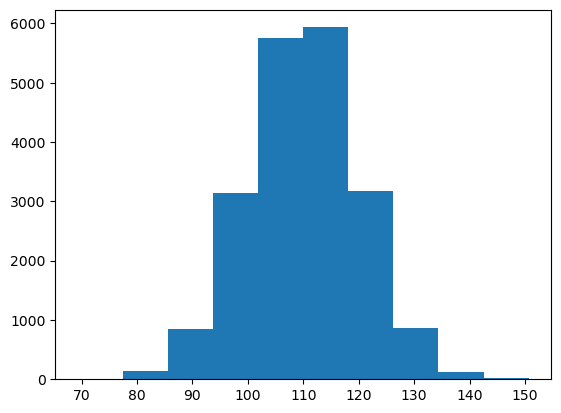

In [2]:
N = 20000 #20,000 students

#Generate from a normal distribution
data = np.random.randn(N)*10 + 110

plt.hist(data)

In [3]:
print("Population mean is:", np.mean(data))
print("Population variance is:", np.var(data))

Population mean is: 110.07413289511938
Population variance is: 98.89323295421896



### 现在让我们抽取样本。 让我们从 10 名学生的样本开始

In [4]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([111.66777512, 112.16222242, 118.08689454, 110.24523641,
       125.48603522,  88.41367076, 125.67988677, 113.88800138,
       108.6807358 , 121.01857026])

In [5]:
print("The sample mean is: ", np.mean(sample_10))

The sample mean is:  113.53290286905217


### 如果我们重复采样过程（例如 1,000 次）怎么样？

In [6]:
#Create an empty list to hold the numbers from each sample
sample_10_mean_list = []

for i in range(1000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_10_mean_list.append(sample_mean)

0  sample mean:  108.17391918529407
1  sample mean:  111.67818693824806
2  sample mean:  111.67822497907324
3  sample mean:  107.24418829414785
4  sample mean:  113.17329723752623
5  sample mean:  112.9070413608591
6  sample mean:  108.04910734829619
7  sample mean:  112.5903576727253
8  sample mean:  113.62852862972878
9  sample mean:  113.27149334572691
10  sample mean:  107.76969738534706
11  sample mean:  109.1620666792978
12  sample mean:  103.71358812699627
13  sample mean:  107.697395964914
14  sample mean:  110.8082408750503
15  sample mean:  110.92158184257207
16  sample mean:  108.58419010871549
17  sample mean:  109.65230764397218
18  sample mean:  109.86678913378717
19  sample mean:  105.08768958694495
20  sample mean:  106.88640190007649
21  sample mean:  112.56008138539062
22  sample mean:  110.83395797118828
23  sample mean:  110.73008027594503
24  sample mean:  109.3294505313664
25  sample mean:  110.04042595076564
26  sample mean:  109.67050530705797
27  sample mean:  

每次采样时我们都会观察到不同的样本均值。 如果我们看一下它们的分布，样本均值的抽样分布是：

(array([  9.,  18.,  71., 148., 220., 207., 164., 105.,  49.,   9.]),
 array([100.41739832, 102.22911703, 104.04083574, 105.85255445,
        107.66427316, 109.47599187, 111.28771058, 113.0994293 ,
        114.91114801, 116.72286672, 118.53458543]),
 <BarContainer object of 10 artists>)

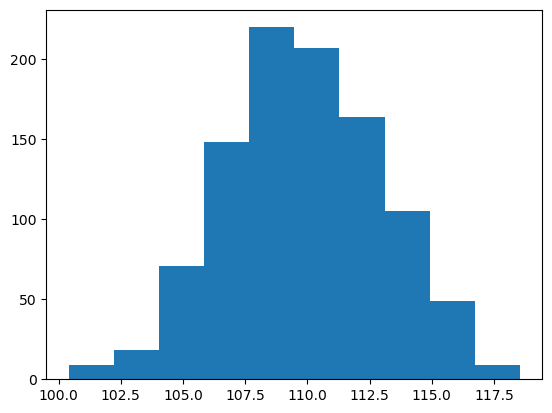

In [7]:
plt.hist(sample_10_mean_list)

**重要提示：**这不是智商水平的分布！ 这是给定样本（样本中有 10 名学生）的平均 IQ 水平超过 1,000 次的分布。

该分布的平均值为：

In [8]:
np.mean(sample_10_mean_list)

109.81834080140132

让我们与总体平均值进行比较：

In [9]:
np.mean(data)

110.07413289511938

相当接近！

如果我们1）增加样本量（10->100），样本均值是否会更接近真实均值？ 2) 进行更多采样（10,000 -> 1,000,000）。 是的！

In [10]:
#Create an empty list to hold the numbers from each sample
sample_100_mean_list = []

for i in range(1000000):
    #generate a sample with 100 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    #print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_100_mean_list.append(sample_mean)

(array([6.80000e+01, 2.14900e+03, 2.68310e+04, 1.42865e+05, 3.29388e+05,
        3.28362e+05, 1.41841e+05, 2.63350e+04, 2.09200e+03, 6.90000e+01]),
 array([105.35779164, 106.30191012, 107.24602861, 108.1901471 ,
        109.13426558, 110.07838407, 111.02250256, 111.96662104,
        112.91073953, 113.85485802, 114.7989765 ]),
 <BarContainer object of 10 artists>)

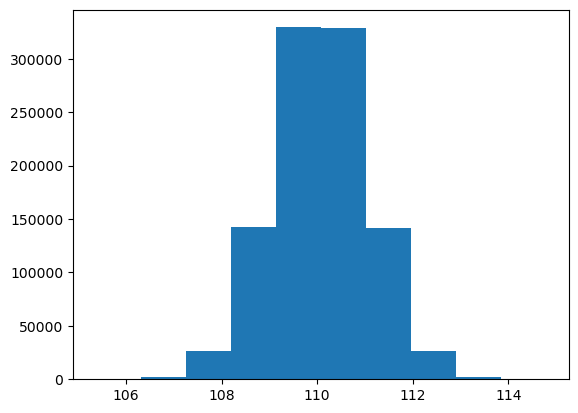

In [11]:
plt.hist(sample_100_mean_list)

In [12]:
print("Average sample mean:", np.mean(sample_100_mean_list))
print("True mean:", np.mean(data))

Average sample mean: 110.07524696756842
True mean: 110.07413289511938


进一步增加样本量和样本次数将使样本均值收敛于真实总体均值，这表明样本均值是一个**无偏**统计量。

我们可以比较使用两个不同样本量时样本均值的分布。

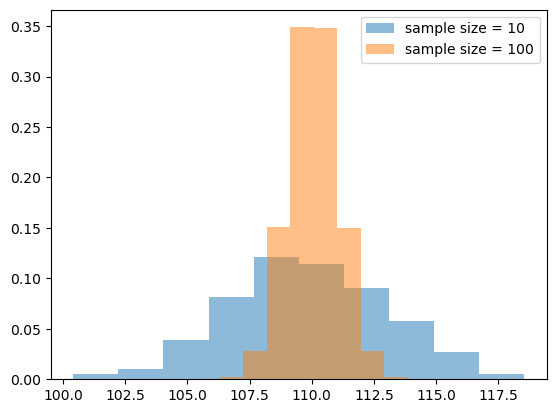

In [13]:
plt.hist(sample_10_mean_list, density=True, alpha=0.5,bins=10,label='sample size = 10')

plt.hist(sample_100_mean_list, density=True, alpha=0.5,bins=10,label='sample size = 100')

plt.legend()

当样本量较小时，抽样分布更宽（即抽样变异性更大）！

这是因为：从分析上来说，样本均值的抽样分布遵循正态分布，均值为总体均值，标准差为：$$\frac{\sigma}{\sqrt{n}}$$

其中 $\sigma$ 是总体标准差，$n$ 是样本量。

In [14]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(10))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_10_mean_list))

Analytical SD of the sampling distribution: 3.1447294470942797
Empirical SD of the sampling distribution: 3.1421107844908382


In [15]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(100))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_100_mean_list))

Analytical SD of the sampling distribution: 0.9944507677819902
Empirical SD of the sampling distribution: 0.994316399287971


### 同样，让我们检查样本方差的抽样分布。

In [16]:
#define a small function to calculate sample variance.
def sample_var(sample):
    mean = np.mean(sample)
    n = sample.shape[0]
    return np.sum((sample - mean)**2)/(n-1)

In [17]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([121.64683719, 103.11098717, 116.80834819, 103.55885849,
        91.93607486, 110.61085577, 120.87592219, 101.59268352,
       117.57011851, 108.56843983])

In [18]:
print("Sample variance is:", sample_var(sample_10))

Sample variance is: 93.84088686288874


In [19]:
#generate samples for multiple times
sample_10_variance_list = []

for i in range(10000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    print(i," sample variance: ", sample_variance)
    
    #append them to the list
    sample_10_variance_list.append(sample_variance)

0  sample variance:  133.16255153634953
1  sample variance:  84.95111363055562
2  sample variance:  129.25853520691152
3  sample variance:  162.9507939120388
4  sample variance:  57.65250685184362
5  sample variance:  127.05245098320125
6  sample variance:  70.03273515311018
7  sample variance:  96.41498645686788
8  sample variance:  83.05696382116894
9  sample variance:  119.12242739103021
10  sample variance:  72.61720603700626
11  sample variance:  160.43777876198675
12  sample variance:  54.52272314054336
13  sample variance:  80.81145488666306
14  sample variance:  228.81586126010967
15  sample variance:  106.522739642925
16  sample variance:  77.8866514777476
17  sample variance:  151.46751140300177
18  sample variance:  73.1007251973789
19  sample variance:  165.15378320450728
20  sample variance:  66.00729221413069
21  sample variance:  83.4768965637748
22  sample variance:  150.89754149053323
23  sample variance:  91.85905584236467
24  sample variance:  61.86926091446177
25  s

3529  sample variance:  107.90190600862965
3530  sample variance:  57.06791924816624
3531  sample variance:  86.42542059993713
3532  sample variance:  110.47640778768063
3533  sample variance:  82.41454606693534
3534  sample variance:  79.2803709778181
3535  sample variance:  106.53291165337448
3536  sample variance:  98.72990213749843
3537  sample variance:  71.05071629311618
3538  sample variance:  50.999331604590814
3539  sample variance:  41.939022525821706
3540  sample variance:  110.23810024449034
3541  sample variance:  141.74349489282224
3542  sample variance:  35.05792295392182
3543  sample variance:  153.12776646656846
3544  sample variance:  69.42240556735997
3545  sample variance:  46.48959418657259
3546  sample variance:  137.291209961558
3547  sample variance:  109.03568296315974
3548  sample variance:  89.3751415830964
3549  sample variance:  92.64208729959574
3550  sample variance:  89.18647567944255
3551  sample variance:  84.71095876621835
3552  sample variance:  137.

方差的抽样分布

(array([9.170e+02, 3.058e+03, 3.017e+03, 1.754e+03, 8.010e+02, 2.870e+02,
        1.000e+02, 5.400e+01, 9.000e+00, 3.000e+00]),
 array([  8.95012759,  45.1402609 ,  81.3303942 , 117.5205275 ,
        153.71066081, 189.90079411, 226.09092741, 262.28106072,
        298.47119402, 334.66132733, 370.85146063]),
 <BarContainer object of 10 artists>)

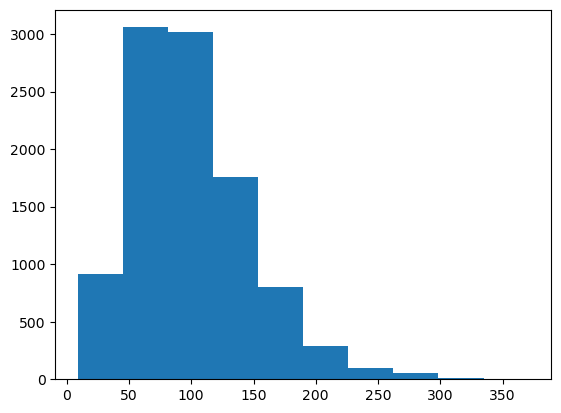

In [20]:
plt.hist(sample_10_variance_list)

In [21]:
print("Average of sample variance:", np.mean(sample_10_variance_list))

print("True variance:", np.var(data))

Average of sample variance: 99.59784954844092
True variance: 98.89323295421896


再次，相当接近！

增加样本大小和样本数量：

In [22]:
#generate samples for multiple times
sample_100_variance_list = []

for i in range(1000000):
    #generate a sample with 100 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    #append them to the list
    sample_100_variance_list.append(sample_variance)

In [23]:
print("Average of sample variance:", np.mean(sample_100_variance_list))
print("True variance:", np.var(data))

Average of sample variance: 98.88787841866694
True variance: 98.89323295421896


靠近点！

比较两个相同大小的样本均值的抽样分布。

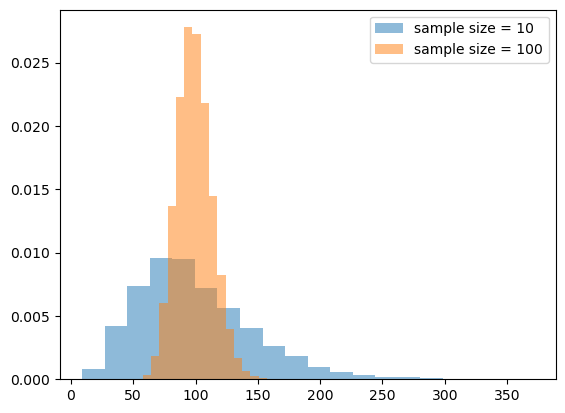

In [24]:
plt.hist(sample_10_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(sample_100_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

从分析上看，样本方差的抽样分布遵循自由度为 n - 1（n 为样本大小）的卡方分布。

$$(n-1)s^2/\sigma^2 \sim \chi^2_{n-1}$$

其中 $s$ 是样本标准差，$\sigma$ 是总体标准差

numpy 函数模拟卡方分布：`random.chisquare(df, size=None)`

In [25]:
anlytical_dist_10 = np.random.chisquare(10-1, 10000)*np.var(data)/(10-1)

anlytical_dist_100 = np.random.chisquare(100-1, 10000)*np.var(data)/(100-1)

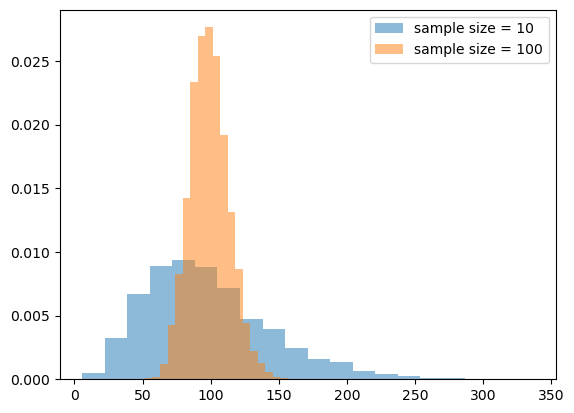

In [26]:
plt.hist(anlytical_dist_10,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(anlytical_dist_100,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

分析分布与我们的经验抽样分布相同！